Dataset Shape: (569, 30)
Target: ['malignant' 'benign']

--- TRAINING & EVALUATION ---
Logistic Regression -> Accuracy: 0.9737
Decision Tree -> Accuracy: 0.9474
Random Forest -> Accuracy: 0.9649
SVM -> Accuracy: 0.9561

--- MODEL COMPARISON TABLE ---


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.973684,0.972222,0.985915,0.979021
2,Random Forest,0.964912,0.958904,0.985915,0.972222
3,SVM,0.956140,0.971429,0.957746,0.964539
1,Decision Tree,0.947368,0.957746,0.957746,0.957746


/tmp/ipython-input-2877276614.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


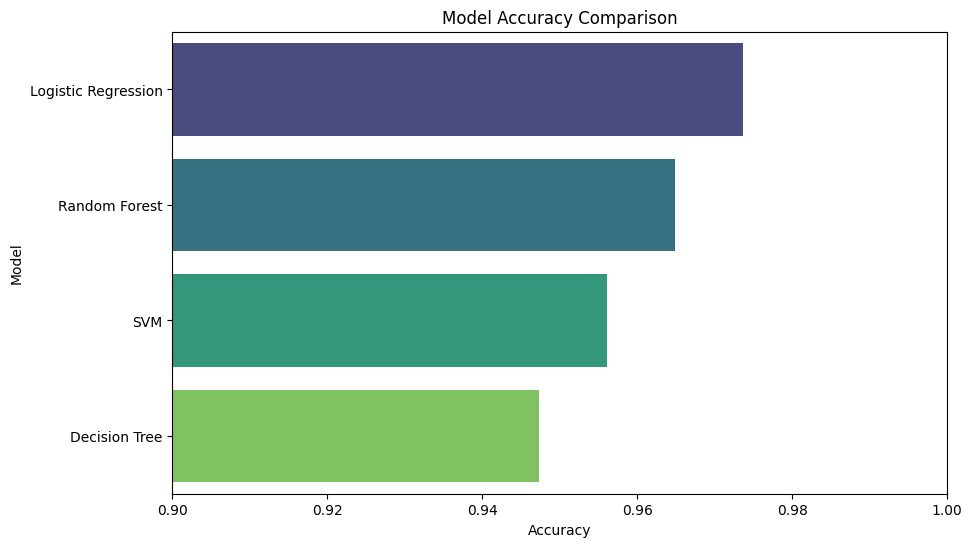


🏆 BEST MODEL: Logistic Regression
Saved Logistic Regression as 'best_model.pkl'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# 1. Load Dataset (Built-in & Reliable)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print(f"Dataset Shape: {X.shape}")
print(f"Target: {data.target_names}")

# 2. Preprocessing
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (Crucial for SVM and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Define Models
# We will compare 4 standard algorithms
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True)
}

# 4. Train & Evaluate Models
results = []

print("\n--- TRAINING & EVALUATION ---")
for name, model in models.items():
    # Train
    # Tree-based models (RF, DT) don't strictly need scaling, but it doesn't hurt.
    # We use scaled data for consistency.
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    print(f"{name} -> Accuracy: {acc:.4f}")

# 5. Create Comparison Table
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\n--- MODEL COMPARISON TABLE ---")
display(results_df)

# 6. Visualization (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlim(0.9, 1.0) # Zoom in to see small differences
plt.show()

# 7. Save the Best Model
# Let's say Random Forest or SVM is the winner (usually SVM/RF for this data)
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")

# Save model and scaler pipeline
joblib.dump({'model': best_model, 'scaler': scaler}, 'best_model.pkl')
print(f"Saved {best_model_name} as 'best_model.pkl'")